# Projeto de Limpeza e Preparação de Dados de Saúde
Este notebook documenta o processo de limpeza e tratamento de um dataset retirado do site da Kaggle, preparando-o para análises estatísticas e modelos de Machine Learning.

https://www.kaggle.com/datasets/prasad22/healthcare-dataset

## 1. Importação de Bibliotecas
Nesta etapa, carregamos as ferramentas essenciais:
* **Pandas/Numpy**: Para manipulação de tabelas e cálculos.
* **Matplotlib/Seaborn**: Para visualização de dados.
* **Scikit-Learn**: Para normalização, codificação e divisão dos dados.
* **Pickle**: Utilizada para salvar e exportar objetos e modelos processados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Carregamento do Conjunto de Dados
Realizamos a leitura do arquivo CSV e fazemos uma inspeção visual das primeiras 5 linhas para entender a estrutura dos dados.

In [9]:
caminho_arquivo = '/content/drive/MyDrive/Data Science - Kaggle/healthcare_dataset.csv'

df = pd.read_csv(caminho_arquivo)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## 3. Diagnóstico e Limpeza de Dados
### 3.1. Verificação de Dimensões
Verificamos o volume total de dados (linhas e colunas) presentes no arquivo original.

In [10]:

df.shape

(55500, 15)

### 3.2. Identificação de Registros Duplicados
Buscamos por linhas que possuem informações idênticas em todas as colunas, o que pode indicar erros de inserção no banco de dados.



In [11]:
# Verificar quantas linhas exatamentes iguais existem no data set(sem incluir a original)
df.duplicated().sum()

np.int64(534)

In [12]:
# Visualizar linhas repetidas
duplicadas = df[df.duplicated()]
duplicadas.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
50081,TRAVis best,65,Female,B+,Asthma,2020-01-15,Kristin Anderson,Thomas-Johnson,Blue Cross,5903.933834,246,Urgent,2020-02-14,Aspirin,Abnormal
50086,MATTHEw foSTer,60,Female,AB-,Obesity,2020-02-12,Taylor Frank,Ltd Alvarado,Aetna,4735.300151,140,Urgent,2020-02-25,Penicillin,Normal
50090,MAnuEL THOrntON,51,Male,O-,Asthma,2023-07-25,Kathy King,"Morgan Hernandez, and Beck",UnitedHealthcare,45601.814762,378,Urgent,2023-08-08,Ibuprofen,Normal
50095,MadelINe BAKer,49,Male,A+,Cancer,2019-11-18,Melissa Alvarado,"Lane Riley and Fisher,",Cigna,3840.740363,144,Emergency,2019-12-07,Paracetamol,Inconclusive
50102,ReginAld WRight,50,Male,AB-,Asthma,2020-04-25,Michael Arias,"Clark, and Estes Thomas",Aetna,26886.655207,210,Urgent,2020-05-03,Paracetamol,Abnormal


### 3.3. Remoção de Duplicatas
Removemos os registros repetidos para evitar viés na análise e conferimos o novo tamanho do dataset após a limpeza.

In [13]:
# Remover as linhas repetidas do dataframe original com objetivo de evitar estatisticas distorcidas como média ou mediana
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df.shape

(54966, 15)

### 3.4. Identificação de Valores Nulos
Nesta etapa, verificamos a existência de dados ausentes no conjunto de dados. A identificação de valores nulos é crucial, pois:
* **Poucos valores nulos:** Podem ser removidos sem impactar a análise.
* **Muitos valores nulos:** Exigem técnicas de imputação (como substituir pela média/mediana em dados numéricos ou pelo valor mais frequente em dados categóricos) para evitar a perda excessiva de informação e manter a eficiência do algoritmo.

In [15]:
# Verificar valores nulos nas colunas
# Caso fosse poucos valores nulos, poderia apenas apagar as linhas que contém esse dado
# Porém se tiver muitas linhas com dados nulos, apagar poderia reduzir a eficiencia do algoritmo.
# Em caso de grande quantidade de dados, poderia substituir pela mediana em casos numéricos ou inserir o valor mais repetido na coluna no caso de ser categorico
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


### 3.5. Inspeção de Consistência Categórica
Nesta etapa, realizamos uma varredura em todas as colunas do DataFrame para listar seus valores únicos. O objetivo é identificar possíveis erros de digitação ou variações inconsistentes em colunas críticas, como:
* **Blood Type** (Tipo Sanguíneo)
* **Gender** (Gênero)
* **Insurance Provider** (Fornecedor de Seguro)
* **Admission Type** (Tipo de Admissão)
* **Medication** (Medicação)
* **Test Results** (Resultado do Exame)

Essa análise visual permite detectar se precisaremos de uma limpeza adicional para agrupar categorias que deveriam ser iguais.

In [16]:
# Verificar os dados de cada coluna para verificar se não há erros de digitação (coluna: tipo sanguineo, sexo,fornecedor de seguro, tipo admissao,medicação,resultado)
for coluna in df.columns:
    print(f"Coluna: {coluna}")
    print(df[coluna].unique())
    print("-" * 30)

Coluna: Name
['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']
------------------------------
Coluna: Age
[30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]
------------------------------
Coluna: Gender
['Male' 'Female']
------------------------------
Coluna: Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
------------------------------
Coluna: Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
------------------------------
Coluna: Date of Admission
['2024-01-31' '2019-08-20' '2022-09-22' ... '2019-05-31' '2023-10-12'
 '2021-03-14']
------------------------------
Coluna: Doctor
['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']
------------------------------

### 5.1. Padronização de Nomes e Observação sobre Relevância
Nesta etapa, formatamos a coluna `Name` para que a primeira letra de cada nome e sobrenome seja maiúscula.

**Nota técnica:** Embora estejamos padronizando os dados, em um fluxo real de Machine Learning, colunas de identificação (como nomes de pacientes) geralmente são removidas antes do treinamento, pois não possuem valor preditivo e podem causar ruído ou problemas de privacidade.

In [17]:
# Organizei a coluna nome para so que a primeira letra de nome e sobrenome estejam em maiuscula.
# Essa coluna nome eu apagaria porque no meu conhecimento não agrega valor para os algoritmos de aprendizado de maquina
df["Name"] = df["Name"].str.title()

In [18]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
54962,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
54963,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
54964,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


### 3.6. Análise de Balanceamento da Variável Alvo
Verificamos a distribuição das categorias na coluna `Test Results` , `Medical Condition` , `Insurance Provider` ,  `Admission Type` , `Medication` .

**Importância do Balanceamento:**
* **Dados Equilibrados:** Garantem que o modelo de Machine Learning aprenda a identificar todas as categorias com a mesma eficiência.
* **Dados Desbalanceados:** Se uma categoria possuir muito mais registros que as outras, o algoritmo tenderá a ficar "viciado" nela, apresentando uma alta taxa de erro para as categorias minoritárias.

Como observado, os resultados estão bem distribuídos, o que favorece o treinamento de um modelo mais justo e preciso.

In [19]:
# Verifiquei a quantidade de dados para cada resultado de testes. Está equilibrado a quantidade, o que é bom para balanceamento dos dados para ML.
# Caso tenha muito dado de um resultado e pouco dos demais, o algoritmo vai ter uma eficácia
# melhor no aprendizado para um e resultado e uma probabilidade de erro maior para os demais
df["Test Results"].value_counts().sort_index()

,count
Test Results,
Abnormal,18437
Inconclusive,18198
Normal,18331


In [20]:
df["Medical Condition"].value_counts().sort_index()

,count
Medical Condition,
Arthritis,9218
Asthma,9095
Cancer,9140
Diabetes,9216
Hypertension,9151
Obesity,9146


In [21]:
df["Insurance Provider"].value_counts().sort_index()

,count
Insurance Provider,
Aetna,10822
Blue Cross,10952
Cigna,11139
Medicare,11039
UnitedHealthcare,11014


In [22]:
df["Admission Type"].value_counts().sort_index()

,count
Admission Type,
Elective,18473
Emergency,18102
Urgent,18391


In [23]:
df["Medication"].value_counts().sort_index()

,count
Medication,
Aspirin,10984
Ibuprofen,11023
Lipitor,11038
Paracetamol,10965
Penicillin,10956


### 3.7. Análise Estatística e Identificação de Anomalias
Utilizamos o método `.describe()` para gerar um resumo estatístico das variáveis numéricas (média, desvio padrão, valores mínimos e máximos).

**Observação Crítica:**
* Através desta análise, identificamos a presença de **valores negativos** na coluna de valores de cobrança (`Billing Amount`).
* Como valores de faturamento não podem ser negativos, isso indica um erro de entrada de dados ou uma inconsistência.

In [24]:
# Podemos ver através dos dados estatisticos que temos um valor negativo em valor de cobrança que pode ser um erro.


df.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


### 3.8. Visualização de Distribuição e Outliers
Nesta etapa, geramos gráficos do tipo **Boxplot** para as variáveis numéricas `Age` (Idade) e `Billing Amount` (Valor de Cobrança). A visualização gráfica é essencial para facilitar a comunicação com a equipe e permite identificar rapidamente:

* **Valores Atípicos (Outliers):** Como os valores negativos de cobrança mencionados anteriormente.
* **Dispersão dos Dados:** A amplitude entre o valor mínimo, máximo e a concentração dos quartis.
* **Tendência Central:** A posição da mediana em relação ao conjunto de dados.

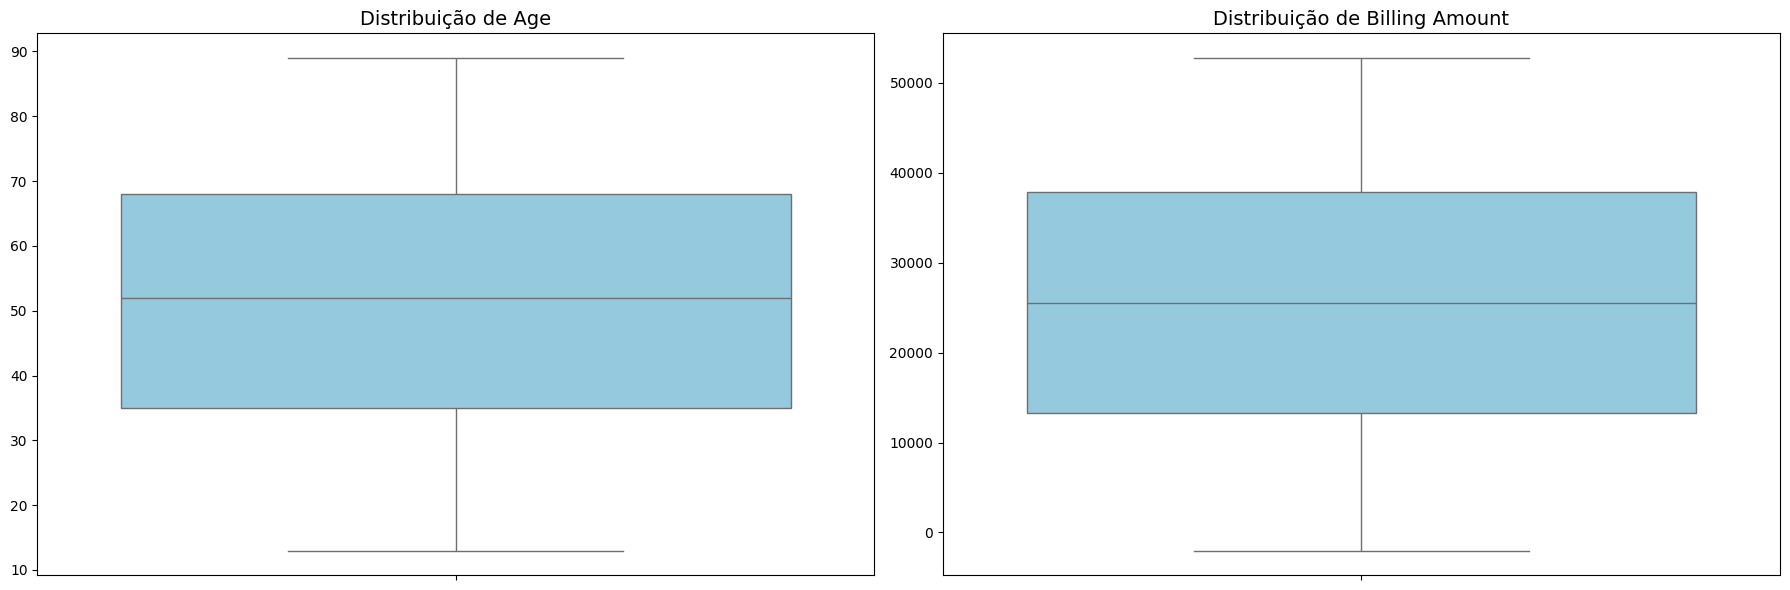

In [25]:
# Criando gráficos para facilitar o entendimento para equipe

# Lista das suas colunas numéricas
colunas = ['Age', 'Billing Amount']

# Criando uma figura com 2 subgráficos lado a lado
fig, axes = plt.subplots(1,2, figsize=(18, 6))

for i, col in enumerate(colunas):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribuição de {col}', fontsize=14)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()

### 3.9. Análise de Correlação entre Condições Médicas e Resultados
Nesta etapa, exploramos a relação entre as patologias registradas e os resultados dos exames dos pacientes.

* **Tabela de Frequência Cruzada:** Utilizamos o `pd.crosstab` para mapear exatamente quantos pacientes de cada condição médica receberam resultados "Normal", "Abnormal" ou "Inconclusive".
* **Visualização Quantitativa:** Geramos um gráfico de barras agrupadas para facilitar a comparação visual entre as categorias.
* **Detalhamento de Dados:** Incluímos rótulos numéricos sobre cada barra para fornecer os valores exatos de frequência, permitindo uma leitura técnica precisa da distribuição dos diagnósticos por condição.

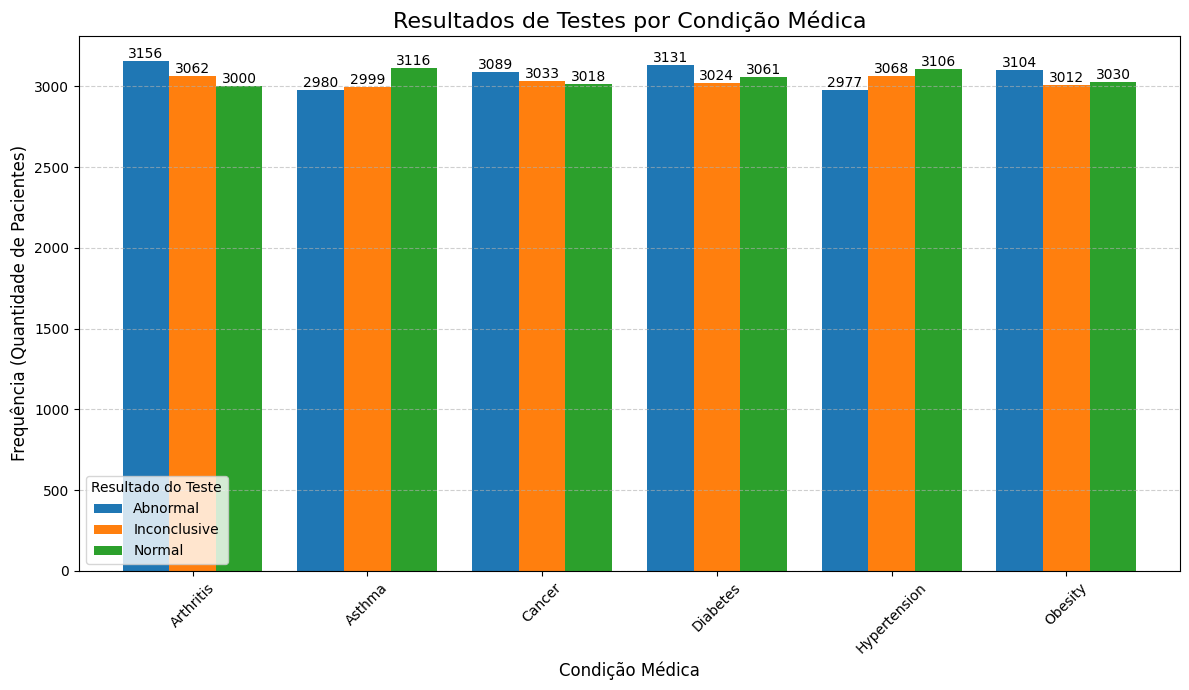

In [26]:
# Linhas: Medical Condition | Colunas: Test Results
df_counts = pd.crosstab(df['Medical Condition'], df['Test Results'])

# Gerar o gráfico de ba
ax = df_counts.plot(kind='bar', figsize=(12, 7), width=0.8)


plt.title('Resultados de Testes por Condição Médica', fontsize=16)
plt.xlabel('Condição Médica', fontsize=12)
plt.ylabel('Frequência (Quantidade de Pacientes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar os números exatos em cima de cada barra
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

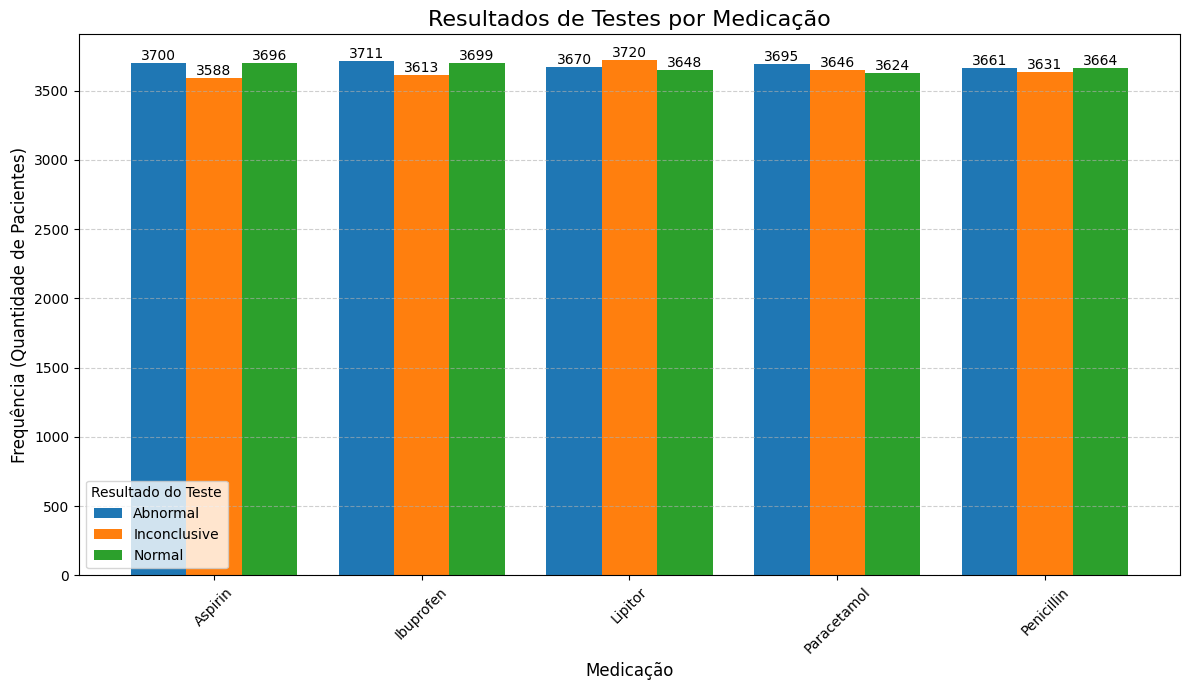

In [27]:

# Linhas: Medication | Colunas: Test Results
df_counts = pd.crosstab(df['Medication'], df['Test Results'])

# Gerar o gráfico de barras
ax = df_counts.plot(kind='bar', figsize=(12, 7), width=0.8)


plt.title('Resultados de Testes por Medicação', fontsize=16)
plt.xlabel('Medicação', fontsize=12)
plt.ylabel('Frequência (Quantidade de Pacientes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar os números exatos em cima de cada barra
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

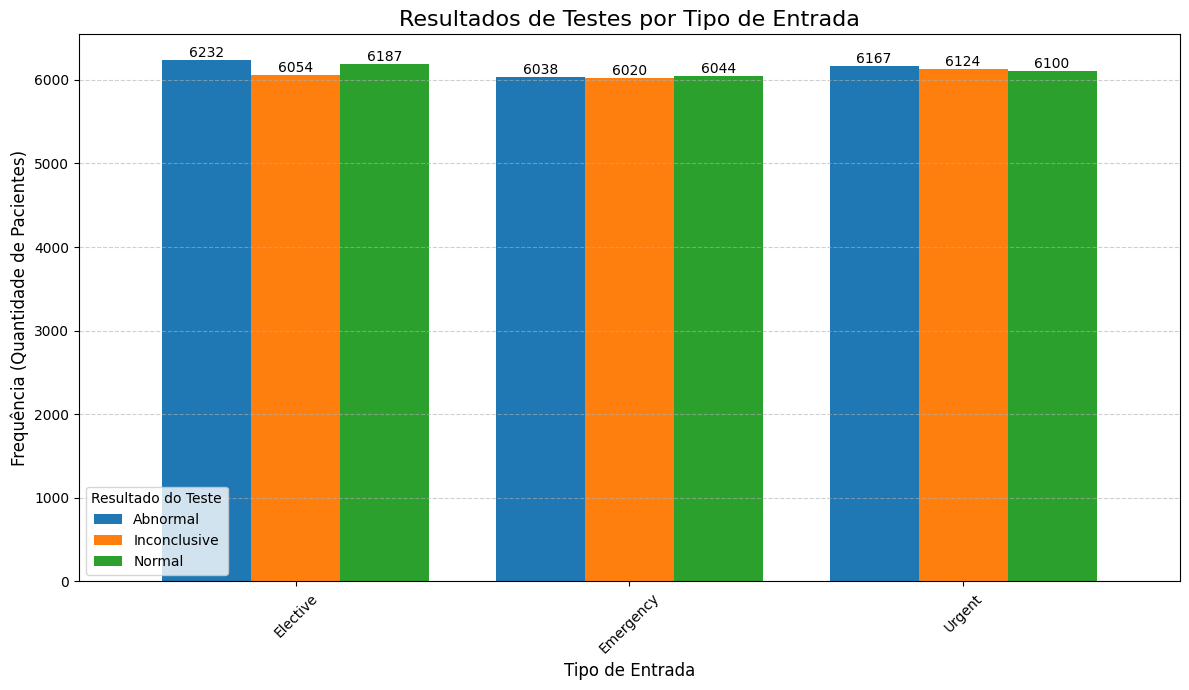

In [28]:

# Linhas: Admission Type | Colunas: Test Results
df_counts = pd.crosstab(df['Admission Type'], df['Test Results'])

# Gerar o gráfico de barras
ax = df_counts.plot(kind='bar', figsize=(12, 7), width=0.8)


plt.title('Resultados de Testes por Tipo de Entrada', fontsize=16)
plt.xlabel('Tipo de Entrada', fontsize=12)
plt.ylabel('Frequência (Quantidade de Pacientes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar os números exatos em cima de cada barra
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

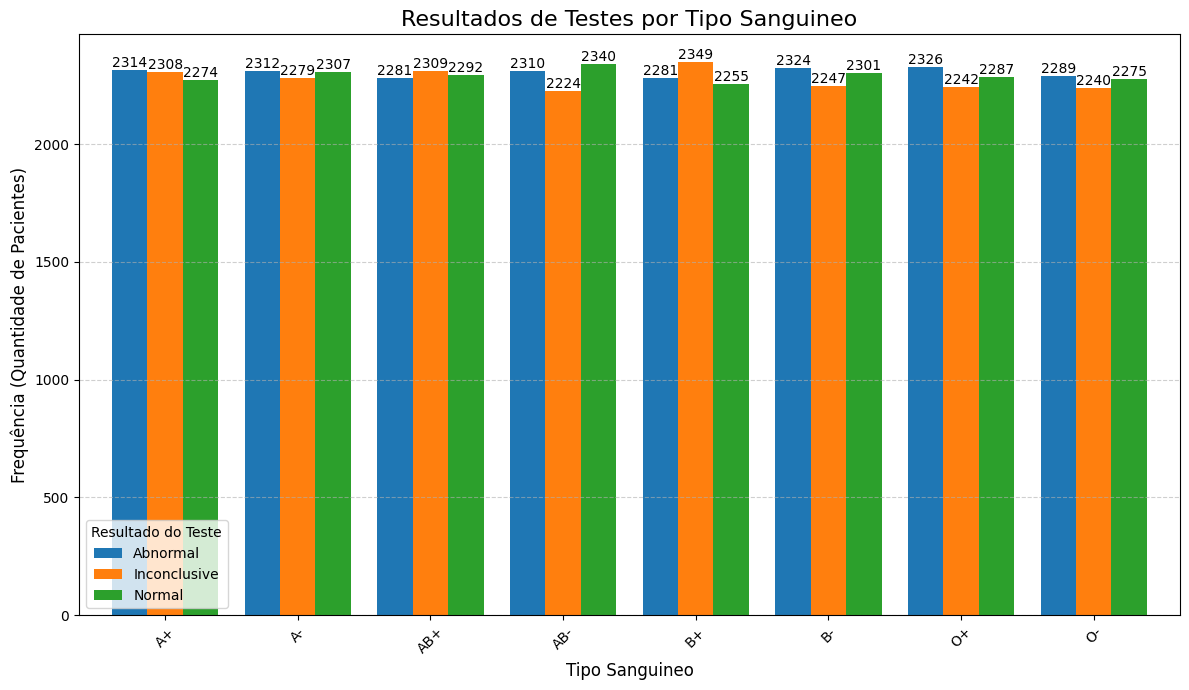

In [29]:
# Linhas: Blood Type | Colunas: Test Results
df_counts = pd.crosstab(df['Blood Type'], df['Test Results'])

# Gerar o gráfico de barras
ax = df_counts.plot(kind='bar', figsize=(12, 7), width=0.8)


plt.title('Resultados de Testes por Tipo Sanguineo', fontsize=16)
plt.xlabel('Tipo Sanguineo', fontsize=12)
plt.ylabel('Frequência (Quantidade de Pacientes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar os números exatos em cima de cada barra
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

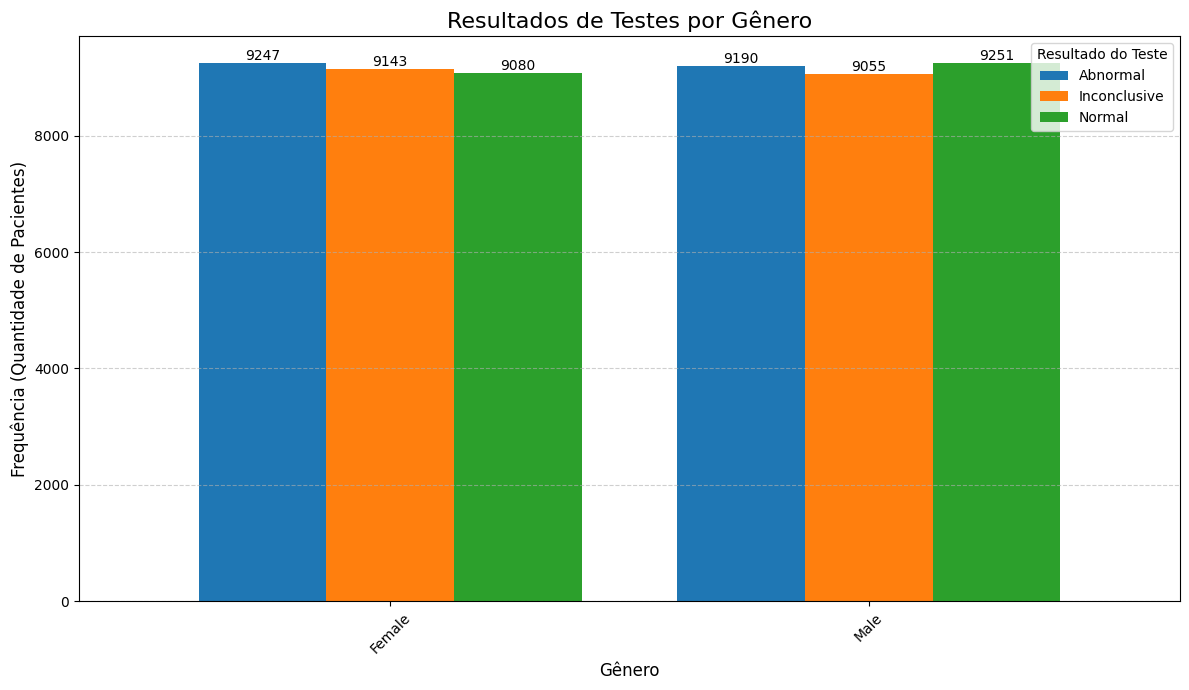

In [30]:
# Linhas: Gender | Colunas: Test Results
df_counts = pd.crosstab(df['Gender'], df['Test Results'])

# Gerar o gráfico de barras
ax = df_counts.plot(kind='bar', figsize=(12, 7), width=0.8)


plt.title('Resultados de Testes por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Frequência (Quantidade de Pacientes)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Resultado do Teste')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar os números exatos em cima de cada barra
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

### 3.11. Análise de Distribuição dos Valores Negativos
Nesta etapa, investigamos se os valores negativos identificados na coluna `Billing Amount` (que representam inconsistências nos dados) estão concentrados em uma categoria específica da classe alvo (`Test Results`) ou se ocorrem de forma equilibrada.

* **Filtro de Inconsistências:** Criamos um subconjunto (`df_negativos`) para isolar apenas os registros com valores de cobrança menores que zero.
* **Distribuição por Classe:** Analisamos a frequência desses erros em relação aos resultados dos testes.
* **Estratégia de Tratamento:** Como os valores negativos estão bem distribuídos entre as classes, a remoção dessas linhas ou a substituição pela mediana não tenderá a enviesar o modelo para uma classe específica. A escolha entre apagar ou substituir dependerá do impacto total que essa exclusão teria no volume total de dados.

In [31]:
# Verificar se os valores negativos estão em apenas um dado da coluna classe
# Estão bem distribuidos e seria um opção apagar essas linhas ou substituir pela sua mediana
df_negativos = df[df['Billing Amount'] < 0]
df_negativos['Test Results'].value_counts()

,count
Test Results,
Inconclusive,39
Abnormal,38
Normal,29


In [32]:
#Quantidade de valores menor que 0
# Temos 106 valores negativos
print(df.loc[df['Billing Amount'] < 0 ].any(axis=1).sum())


106


### 3.12. Tratamento de Inconsistências: Imputação pela Mediana
Nesta etapa, corrigimos os valores negativos identificados na coluna `Billing Amount` utilizando a técnica de imputação.

* **Cálculo da Mediana:** Calculamos a mediana utilizando apenas os registros que possuem valores maiores ou iguais a zero. Isso garante que o valor substituto seja estatisticamente representativo da realidade financeira do dataset, sem ser distorcido pelos erros.
* **Substituição (Imputação):** Todos os valores menores que zero são substituídos por essa mediana. Essa abordagem é preferível à exclusão das linhas quando queremos preservar o tamanho do conjunto de dados para o treinamento do modelo.

In [33]:
# Substituir valores negativos pela mediana(apenas dos valores maiores que 0)

# 1. Calcular a mediana da coluna
mediana = df.loc[df["Billing Amount"] >= 0, "Billing Amount"].median()

# 2. Substituir os valores negativos pela mediana
df.loc[df["Billing Amount"] < 0, "Billing Amount"] = mediana

In [34]:
#Comprovando que os dados negativos foram apagados do dataset.
df.loc[df['Billing Amount'] < 0 ].any(axis=1).sum()

np.int64(0)

In [35]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
54962,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
54963,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
54964,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


### 3.13. Verificação de Cardinalidade (Valores Únicos)
Nesta etapa, contabilizamos a quantidade de valores distintos em cada coluna do conjunto de dados utilizando o método `.nunique()`.

**Por que isso é importante?**
* **Identificação de Identificadores:** Colunas com um número de valores únicos muito próximo ao total de linhas (como nomes de pacientes) geralmente não ajudam na generalização do modelo.
* **Análise de Categorias:** Verificamos a cardinalidade de colunas como `Doctor` (Médico) e `Hospital`. Uma alta cardinalidade (muitos nomes diferentes) indica que essas variáveis podem exigir técnicas especiais de codificação ou podem ser desconsideradas se não houver um padrão estatístico relevante associado a cada profissional ou unidade de saúde.

In [36]:
# Verificar a quantidade de dados unicos nas colunas
# Aqui verifico em especial a coluna Doctor e hospital

df.nunique()

,0
Name,40235
Age,77
Gender,2
Blood Type,8
Medical Condition,6
Date of Admission,1827
Doctor,40341
Hospital,39876
Insurance Provider,5
Billing Amount,49905


## 4. Análise Técnica das Colunas
Exibimos as primeiras linhas e utilizamos o método `.info()` para verificar os tipos de dados (Dtype) e a existência de valores nulos em cada coluna.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.3

### 4.1. Engenharia de Atributos: Cálculo da Duração da Internação (Horas)
Nesta etapa, criamos uma nova métrica numérica para quantificar o tempo de permanência do paciente no hospital com maior precisão do que apenas em dias.

* **Reposicionamento da Classe Alvo:** Removemos temporariamente a coluna `Test Results` para garantir que as novas variáveis sejam inseridas antes dela, mantendo a variável alvo sempre na última posição do DataFrame.
* **Cálculo Temporal:** Convertemos as datas para o formato adequado e calculamos a diferença total em horas (`Duration_Hours`), arredondando para duas casas decimais.
* **Organização Final:** Reinserimos a coluna de resultados ao final do dataset, facilitando a separação de atributos e alvo durante a fase de treinamento do modelo.

In [38]:
# Criar uma coluna com o total de horas que o paciente ficou internado

# Salvar a coluna classe para adiciona-la ao final do dataframe.
coluna_test_results = df.columns[-1]
ultima_coluna_valores = df.pop(coluna_test_results)

# Convertendo as colunas para o formato de data e hora
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
# Cria a nova coluna (ela passará a ser a última no momento)
df['Duration_Hours'] = (df['Discharge Date'] - df['Date of Admission']).dt.total_seconds() / 3600
df['Duration_Hours'] = df['Duration_Hours'].round(2)

# Adiciona de volta a coluna que você salvou (ela assume a nova última posição)
df[coluna_test_results] = ultima_coluna_valores

# Conferindo o final do DataFrame
print(df.columns[-3:])


Index(['Medication', 'Duration_Hours', 'Test Results'], dtype='object')


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object    

In [40]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Duration_Hours,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,48.0,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,144.0,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,360.0,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,720.0,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,480.0,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,720.0,Abnormal
54962,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,216.0,Normal
54963,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,672.0,Abnormal
54964,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,144.0,Abnormal


## 8. Pré-processamento e Escalonamento de Atributos

Nesta etapa, ajustamos a escala dos dados numéricos para que todas as variáveis contribuam de forma equilibrada para o modelo de Machine Learning, evitando que atributos com valores elevados dominem o aprendizado apenas pela sua magnitude.

### 8.1. Padronização e Normalização
Diferentes técnicas foram aplicadas dependendo da natureza de cada coluna:

* **StandardScaler (Padronização):** Aplicado às colunas `Billing Amount` e `Duration_Hours`. Como estas variáveis possuem valores com grande amplitude e variância, a padronização transforma os dados para terem média 0 e desvio padrão 1, lidando melhor com a dispersão e possíveis discrepâncias.
* **MinMaxScaler (Normalização):** Aplicado à coluna `Age`. Como a idade possui um intervalo bem definido e sem variações extremas, os valores foram transformados para uma escala entre 0 e 1.

Este processo é fundamental para garantir que algoritmos baseados em distâncias ou gradientes funcionem corretamente e convirjam mais rapidamente.

In [41]:
#Fazer a normalização dos dados para coluna idade e Standarização das colunas valor consulta e horas
# Utilizei o método standarscaler por as colunas de horas e valor da consulta possui valores muito distantes entre si.
# Como a coluna idade não tem essa variação toda, utilizei a normalização deixando os dados variando entre 0 e 1.

# Inicializar o escalonador
scaler_stand = StandardScaler()
scaler_norm = MinMaxScaler()

# Aplicar a transformação
df[['Billing Amount', 'Duration_Hours']] = scaler_stand.fit_transform(df[['Billing Amount', 'Duration_Hours']])
df[['Age']] = scaler_norm.fit_transform(df[['Age']])

In [42]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Duration_Hours,Test Results
0,Bobby Jackson,0.223684,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,-0.475803,328,Urgent,2024-02-02,Paracetamol,-1.558559,Normal
1,Leslie Terry,0.644737,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,0.568328,265,Emergency,2019-08-26,Ibuprofen,-1.096739,Inconclusive
2,Danny Smith,0.828947,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,0.166675,205,Emergency,2022-10-07,Aspirin,-0.057646,Normal
3,Andrew Watts,0.197368,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,0.869587,450,Elective,2020-12-18,Ibuprofen,1.674178,Abnormal
4,Adrienne Bell,0.394737,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,-0.801883,458,Urgent,2022-10-09,Penicillin,0.519629,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,0.381579,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,-1.620097,417,Elective,2020-09-15,Penicillin,1.674178,Abnormal
54962,Kyle Perez,0.631579,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,0.414005,316,Elective,2020-02-01,Aspirin,-0.750375,Normal
54963,Heather Wang,0.328947,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,0.143068,347,Urgent,2020-08-10,Ibuprofen,1.443268,Abnormal
54964,Jennifer Jones,0.394737,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,0.484143,321,Elective,2019-05-31,Ibuprofen,-1.096739,Abnormal


### 8.2. Codificação de Variáveis Categóricas Ordinais (Label Encoding)
Nesta etapa, tratamos a variável `Admission Type` (Tipo de Admissão). Como essa coluna possui uma hierarquia lógica (Eletiva < Urgência < Emergência), ela é classificada como uma variável **ordinal**.

* **Por que não usar o LabelEncoder padrão?** O `LabelEncoder` do Scikit-Learn atribui números seguindo a ordem alfabética. Para manter a semântica da gravidade do atendimento, optamos por um mapeamento manual.
* **Hierarquia Definida:** * `Elective` (0): Menor urgência.
    * `Urgent` (1): Urgência intermediária.
    * `Emergency` (2): Maior gravidade.
* **Resultado:** Transformamos categorias de texto em valores numéricos que o algoritmo pode interpretar respeitando a ordem de importância.

In [43]:
# Utilizar Label Encoder para coluna admission type, ja que temos uma hierarquia no diagnostico de entrada (eletivo, urgencia, emergencia)

# Como o label encoder do Scikit-Learn segue a ordem alfabética, realizei a mudança de categorico para numerico com o pandas
# Seguindo o grau de hierarquia abaixo:

hierarquia_diagnostico = {
    'Elective': 0,
    'Urgent': 1,
    'Emergency': 2
}

# Aplicamos a substituição
df['Admission Type'] = df['Admission Type'].replace(hierarquia_diagnostico)

/tmp/ipython-input-2070107658.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Admission Type'] = df['Admission Type'].replace(hierarquia_diagnostico)


### 8.3. Codificação da Variável Alvo (Target Encoding)
Nesta etapa, aplicamos a codificação numérica à nossa variável dependente `Test Results`. Assim como na etapa anterior, optamos por uma substituição manual em vez de utilizar o `LabelEncoder` automático para garantir que os valores numéricos sigam uma lógica específica definida por nós.

**Mapeamento aplicado:**
* `Normal`: 0
* `Inconclusive`: 1
* `Abnormal`: 2

Essa transformação é essencial, pois a maioria dos algoritmos de Machine Learning exige que a variável alvo seja numérica para realizar os cálculos de perda e otimização durante o treinamento.

In [44]:
# Utilizar Label Encoder para coluna classe
# Como o label encoder do Scikit-Learn segue a ordem alfabética, realizei a mudança de categorico para numerico com o pandas
# Seguindo o grau de hierarquia abaixo:

test_results = {
    'Normal': 0,
    'Inconclusive': 1,
    'Abnormal': 2
}

# Aplicamos a substituição
df['Test Results'] = df['Test Results'].replace(test_results)

/tmp/ipython-input-1021699743.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Test Results'] = df['Test Results'].replace(test_results)


In [45]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Duration_Hours,Test Results
0,Bobby Jackson,0.223684,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,-0.475803,328,1,2024-02-02,Paracetamol,-1.558559,0
1,Leslie Terry,0.644737,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,0.568328,265,2,2019-08-26,Ibuprofen,-1.096739,1
2,Danny Smith,0.828947,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,0.166675,205,2,2022-10-07,Aspirin,-0.057646,0
3,Andrew Watts,0.197368,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,0.869587,450,0,2020-12-18,Ibuprofen,1.674178,2
4,Adrienne Bell,0.394737,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,-0.801883,458,1,2022-10-09,Penicillin,0.519629,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,0.381579,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,-1.620097,417,0,2020-09-15,Penicillin,1.674178,2
54962,Kyle Perez,0.631579,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,0.414005,316,0,2020-02-01,Aspirin,-0.750375,0
54963,Heather Wang,0.328947,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,0.143068,347,1,2020-08-10,Ibuprofen,1.443268,2
54964,Jennifer Jones,0.394737,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,0.484143,321,0,2019-05-31,Ibuprofen,-1.096739,2


### 8.4. Codificação de Variáveis Categóricas Nominais (One-Hot Encoding)
Nesta etapa, tratamos as colunas que não possuem uma ordem inerente (variáveis nominais), como `Gender`, `Blood Type`, `Medical Condition` e `Medication`.

* **Funcionamento:** Diferente do Label Encoding, o **One-Hot Encoding** cria colunas binárias (0 ou 1) para cada categoria, permitindo que o modelo matemático entenda as diferenças entre elas sem assumir que uma é "maior" ou "melhor" que a outra.
* **Evitando Redundância:** Utilizamos o parâmetro `drop='first'` para evitar a "armadilha da variável dummy" (multicolinearidade). Isso significa que, se tivermos duas categorias, apenas uma coluna é necessária para representá-las (se for 0 em uma, obrigatoriamente é 1 na outra).
* **Resultado Final:** As colunas de texto originais são descartadas e substituídas por suas versões codificadas, resultando em um DataFrame puramente numérico e pronto para o processamento.

In [46]:
# Aplicar onehot encoder nas colunas genero,tipo sangue, condição medica e medicação


colunas_categoricas = ['Gender', 'Blood Type','Medical Condition','Medication']

# Inicializar o encoder
# drop='first' evita redundância; sparse_output=False garante que retorne um array comum
one_hot_encoder = OneHotEncoder(drop='first',sparse_output=False)

# Aplicar a transformação
# Array NumPy
dados_categoricos = one_hot_encoder.fit_transform(df[colunas_categoricas])

# Criar um novo DataFrame com as novas colunas e nomes corretos
df_encoded = pd.DataFrame(
    dados_categoricos,
    columns=one_hot_encoder.get_feature_names_out(colunas_categoricas),
    index=df.index  # Mantém os mesmos índices do original
)

# Juntar ao DataFrame original e remover as colunas antigas de texto
df = pd.concat([df.drop(columns=colunas_categoricas), df_encoded], axis=1)

In [47]:
# Colocar a coluna Classe como última no dataframe

nome_coluna_classe = 'Test Results'

# 2. Só faz o processo se a coluna alvo existir no DataFrame
if nome_coluna_classe in df.columns:
    # Salva e remove a coluna alvo de onde ela estiver
    col_classe = df.pop(nome_coluna_classe)

df[nome_coluna_classe] = col_classe

In [48]:
df.columns

Index(['Name', 'Age', 'Date of Admission', 'Doctor', 'Hospital',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Discharge Date', 'Duration_Hours', 'Gender_Male', 'Blood Type_A-',
       'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+', 'Blood Type_B-',
       'Blood Type_O+', 'Blood Type_O-', 'Medical Condition_Asthma',
       'Medical Condition_Cancer', 'Medical Condition_Diabetes',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin', 'Test Results'],
      dtype='object')

In [49]:
df

,Name,Age,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
0,Bobby Jackson,0.223684,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,-0.475803,328,1,2024-02-02,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,Leslie Terry,0.644737,2019-08-20,Samantha Davies,Kim Inc,Medicare,0.568328,265,2,2019-08-26,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,Danny Smith,0.828947,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,0.166675,205,2,2022-10-07,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,Andrew Watts,0.197368,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,0.869587,450,0,2020-12-18,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,Adrienne Bell,0.394737,2022-09-19,Kathleen Hanna,White-White,Aetna,-0.801883,458,1,2022-10-09,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,0.381579,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,-1.620097,417,0,2020-09-15,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
54962,Kyle Perez,0.631579,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,0.414005,316,0,2020-02-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
54963,Heather Wang,0.328947,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,0.143068,347,1,2020-08-10,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
54964,Jennifer Jones,0.394737,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,0.484143,321,0,2019-05-31,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


### 8.5. Extração de Componentes Temporais (Granularidade de Ano)
Nesta etapa, simplificamos as informações de data para focar apenas na variação anual.

* **Simplificação de Dados:** Ao extrair apenas o ano das colunas `Date of Admission` e `Discharge Date`, reduzimos a complexidade do modelo, transformando uma data completa (dia/mês/ano) em uma variável numérica discreta.
* **Objetivo:** Isso permite que o algoritmo identifique padrões ou tendências sazonais de longo prazo (anual) sem se perder em detalhes excessivos que poderiam causar *overfitting*, como o dia específico da semana ou do mês, caso estes não sejam relevantes para a análise.

In [50]:
# Extrair apenas o ano das colunas de data de entrada e saida
df['Date of Admission'] = df['Date of Admission'].dt.year
df['Discharge Date'] = df['Discharge Date'].dt.year

In [51]:
df

,Name,Age,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
0,Bobby Jackson,0.223684,2024,Matthew Smith,Sons and Miller,Blue Cross,-0.475803,328,1,2024,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,Leslie Terry,0.644737,2019,Samantha Davies,Kim Inc,Medicare,0.568328,265,2,2019,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,Danny Smith,0.828947,2022,Tiffany Mitchell,Cook PLC,Aetna,0.166675,205,2,2022,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,Andrew Watts,0.197368,2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,0.869587,450,0,2020,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,Adrienne Bell,0.394737,2022,Kathleen Hanna,White-White,Aetna,-0.801883,458,1,2022,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,Elizabeth Jackson,0.381579,2020,Joshua Jarvis,Jones-Thompson,Blue Cross,-1.620097,417,0,2020,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
54962,Kyle Perez,0.631579,2020,Taylor Sullivan,Tucker-Moyer,Cigna,0.414005,316,0,2020,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
54963,Heather Wang,0.328947,2020,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,0.143068,347,1,2020,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
54964,Jennifer Jones,0.394737,2019,Kimberly Curry,"Jackson Todd and Castro,",Medicare,0.484143,321,0,2019,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


### 8.5. Remoção de Variáveis Irrelevantes (Feature Selection)

Nesta etapa final de limpeza, removemos as colunas que não agregam valor preditivo ao modelo de Machine Learning ou que poderiam causar ruído.

* **Identificadores Únicos:** Colunas como `Name`, `Doctor`, `Hospital` e `Room Number` possuem alta cardinalidade e referem-se a casos específicos que não ajudam o algoritmo a generalizar padrões para novos pacientes.
* **Dados Redundantes:** Após extrairmos a duração da internação em horas e dias, as colunas originais de datas (`Date of Admission` e `Discharge Date`) tornam-se desnecessárias.
* **Privacidade e Eficiência:** A exclusão de `Insurance Provider` e nomes ajuda a reduzir a dimensionalidade do dataset, tornando o treinamento mais rápido e focado apenas em dados clínicos e demográficos relevantes.





In [52]:
# Excluir colunas Nome, Nome médico, Hospital, Nome do seguro e os anos.

df.drop(['Name', 'Doctor', 'Hospital','Insurance Provider','Date of Admission','Discharge Date','Room Number'], axis=1, inplace=True, errors='ignore')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54966 entries, 0 to 54965
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             54966 non-null  float64
 1   Billing Amount                  54966 non-null  float64
 2   Admission Type                  54966 non-null  int64  
 3   Duration_Hours                  54966 non-null  float64
 4   Gender_Male                     54966 non-null  float64
 5   Blood Type_A-                   54966 non-null  float64
 6   Blood Type_AB+                  54966 non-null  float64
 7   Blood Type_AB-                  54966 non-null  float64
 8   Blood Type_B+                   54966 non-null  float64
 9   Blood Type_B-                   54966 non-null  float64
 10  Blood Type_O+                   54966 non-null  float64
 11  Blood Type_O-                   54966 non-null  float64
 12  Medical Condition_Asthma        

In [54]:
df

,Age,Billing Amount,Admission Type,Duration_Hours,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
0,0.223684,-0.475803,1,-1.558559,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.644737,0.568328,2,-1.096739,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
2,0.828947,0.166675,2,-0.057646,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.197368,0.869587,0,1.674178,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2
4,0.394737,-0.801883,1,0.519629,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54961,0.381579,-1.620097,0,1.674178,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
54962,0.631579,0.414005,0,-0.750375,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
54963,0.328947,0.143068,1,1.443268,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
54964,0.394737,0.484143,0,-1.096739,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2


In [55]:
df.shape

(54966, 22)

In [56]:
corr = df.corr()
corr

,Age,Billing Amount,Admission Type,Duration_Hours,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Medical Condition_Asthma,Medical Condition_Cancer,Medical Condition_Diabetes,Medical Condition_Hypertension,Medical Condition_Obesity,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results
Age,1.000000,-0.003306,0.002201,0.007890,-0.002510,-0.001803,-0.000483,-0.000903,0.006662,-0.005608,...,0.001367,0.000158,0.001067,0.004166,-0.006881,0.001353,-0.006700,0.000954,-0.003065,0.006974
Billing Amount,-0.003306,1.000000,-0.003233,-0.004796,0.004556,0.001714,-0.005459,0.004359,-0.003650,-0.000249,...,0.002848,-0.012232,0.003785,-0.001095,0.008329,0.007074,-0.007402,0.000361,-0.001879,0.003001
Admission Type,0.002201,-0.003233,1.000000,0.003389,-0.003141,-0.001107,0.002996,-0.005232,0.011082,-0.001188,...,-0.001777,-0.003852,0.001147,-0.008696,0.008787,0.000357,0.003702,0.000726,-0.000840,-0.001371
Duration_Hours,0.007890,-0.004796,0.003389,1.000000,0.004224,-0.002829,0.004988,-0.002052,0.008467,0.001015,...,0.009151,0.000099,-0.003556,-0.003254,-0.002665,-0.002532,-0.001537,0.000527,0.002580,-0.001289
Gender_Male,-0.002510,0.004556,-0.003141,0.004224,1.000000,0.003226,0.003559,0.000811,0.010209,0.001031,...,0.003363,0.000180,-0.000310,0.000423,-0.000211,-0.003372,0.001489,0.008368,0.000766,-0.005073
Blood Type_A-,-0.001803,0.001714,-0.001107,-0.002829,0.003226,1.000000,-0.143315,-0.143219,-0.143350,-0.143196,...,0.003047,-0.003397,-0.000378,0.005541,-0.002917,-0.003750,0.000655,0.006038,-0.007964,-0.000557
Blood Type_AB+,-0.000483,-0.005459,0.002996,0.004988,0.003559,-0.143315,1.000000,-0.143029,-0.143160,-0.143006,...,0.005069,-0.006551,0.001635,0.008596,-0.004298,0.000806,0.000410,-0.001770,0.006778,-0.001631
Blood Type_AB-,-0.000903,0.004359,-0.005232,-0.002052,0.000811,-0.143219,-0.143029,1.000000,-0.143065,-0.142911,...,-0.002133,0.006346,-0.003025,-0.005377,0.000326,-0.004743,-0.003899,0.002302,0.009617,-0.002909
Blood Type_B+,0.006662,-0.003650,0.011082,0.008467,0.010209,-0.143350,-0.143160,-0.143065,1.000000,-0.143041,...,-0.005211,0.006071,0.003768,-0.008742,-0.001272,-0.002160,0.007462,-0.003503,0.001054,0.000855
Blood Type_B-,-0.005608,-0.000249,-0.001188,0.001015,0.001031,-0.143196,-0.143006,-0.142911,-0.143041,1.000000,...,-0.004305,-0.001730,-0.002387,0.002793,0.005692,0.002456,-0.001785,-0.005764,0.001411,0.000656


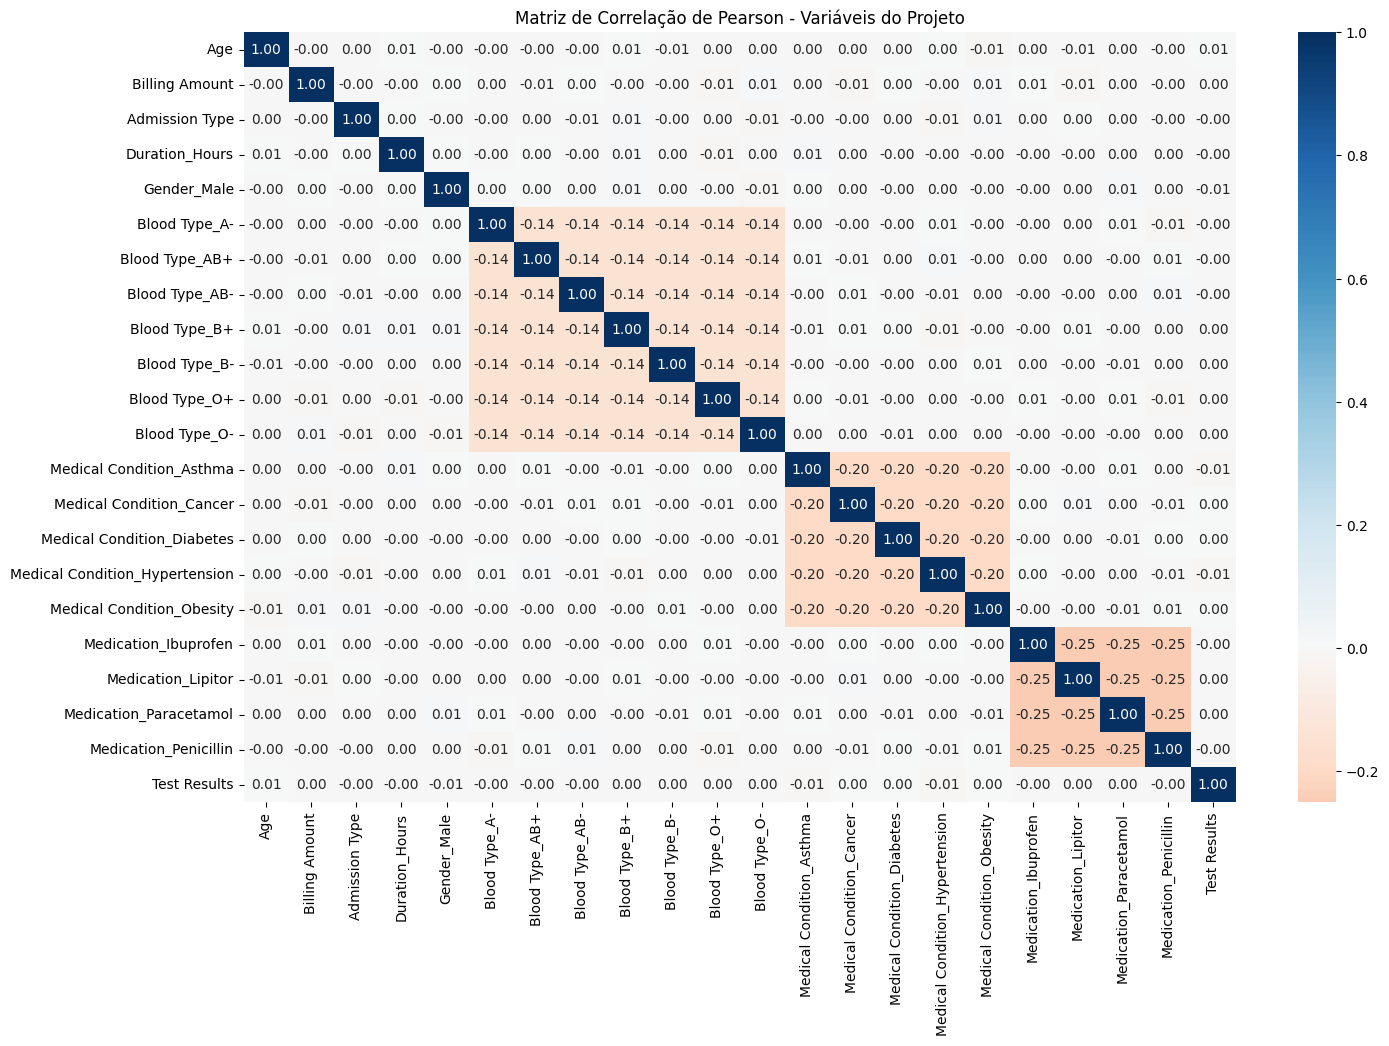

In [57]:

plt.figure(figsize=(16, 10))

# Criando o Heatmap

sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', center=0)

plt.title('Matriz de Correlação de Pearson - Variáveis do Projeto')
plt.show()

# Conclusão da Etapa de Pré-processamento

Nesta fase, realizamos a limpeza, tratamento de valores nulos, codificação de variáveis e normalização dos dados.

**Arquivo Gerado:** `healthcare_cleaning.csv`



In [59]:
# Definindo o nome do arquivo
df_cleaning = 'healthcare_dataset_cleaning.csv'

# Salvando em CSV (index=False evita que o pandas crie uma coluna extra de ID)
df.to_csv(df_cleaning, index=False)


## 9. Separação de Atributos e Variável Alvo (X e y)

Nesta etapa, dividimos o conjunto de dados para que o modelo saiba o que deve analisar (previsores) e o que deve aprender a prever (classe alvo).

* **Definição dos Previsores (X):** Selecionamos as colunas que contêm as características clínicas e demográficas dos pacientes (neste caso, as primeiras 21 colunas do DataFrame).
* **Definição da Classe (y):** Isolamos a variável `Test Results` como o objetivo da predição.
* **Otimização de Performance:** Embora o código realize a seleção no DataFrame, a lógica de converter esses dados para arrays **NumPy** é fundamental. Isso ocorre porque cálculos matemáticos em arrays são significativamente mais rápidos e eficientes do que em estruturas de DataFrame, algo essencial para o treinamento de algoritmos de Machine Learning em grandes volumes de dados.

In [ ]:
# Separando os dados em previsores e classe e convertendo-os em array numpy para facilitar os calculos matematicos(mais rapido do que dataframe)

x_previsores = df.iloc[:,0:21]
y_classe = df.iloc[:,-1]


### 9.1. Conversão para Arrays NumPy
Nesta etapa, convertemos o DataFrame de atributos previsores em um objeto **NumPy Array**.

* **Vantagem Computacional:** Arrays do NumPy são estruturas de baixo nível que permitem que os algoritmos de Machine Learning realizem cálculos de álgebra linear (essenciais para o treinamento) com uma velocidade muito superior à de um DataFrame do Pandas.
* **Compatibilidade:** A maioria das bibliotecas de alto desempenho, como o Scikit-Learn e o TensorFlow, utilizam arrays como formato padrão de entrada para seus modelos.

In [ ]:
# Converter em array numpy
x_previrores = x_previsores.values


In [ ]:
y_classe = y_classe.values

In [ ]:
x_previrores.shape

(54966, 21)

In [ ]:
y_classe.shape

(54966,)

In [ ]:
x_previrores

array([[ 0.22368421, -0.47580293,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.64473684,  0.56832789,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82894737,  0.16667515,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.32894737,  0.14306762,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39473684,  0.48414277,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52631579, -1.52410695,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
y_classe

array([0, 1, 0, ..., 2, 2, 2])

### Separar dados em treinamento e teste

## 10. Divisão do Conjunto de Dados: Treinamento e Teste

Nesta etapa crucial, dividimos nossos dados processados em dois subconjuntos distintos para garantir que possamos avaliar o desempenho real do modelo futuramente.

* **Conjunto de Treinamento (70%):** Utilizado para que o algoritmo aprenda os padrões e relações entre as variáveis clínicas e o resultado do teste.
* **Conjunto de Teste (30%):** Reservado para simular dados novos e desconhecidos pelo modelo. É através deste conjunto que validamos se o modelo realmente aprendeu a generalizar ou se apenas decorou os dados (overfitting).
* **Reprodutibilidade (random_state=0):** Definimos um estado aleatório fixo para garantir que, sempre que o código for executado, a divisão dos dados seja a mesma, permitindo comparações consistentes entre diferentes testes e modelos.

In [ ]:
x_previsores_treinamento, x_previsores_teste, y_classe_treinamento, y_classe_teste = train_test_split(x_previsores, y_classe,
                                                                                                            test_size=0.30,random_state=0)

In [ ]:
x_previsores_treinamento.shape

(38476, 21)

In [ ]:
x_previsores_teste.shape

(16490, 21)

In [ ]:
y_classe_treinamento.shape

(38476,)

In [ ]:
y_classe_teste.shape

(16490,)

### Salvar dados com Pickle

## 11. Exportação dos Dados Processados (Persistência)

Nesta etapa final, utilizamos a biblioteca **Pickle** para salvar os conjuntos de dados de treinamento e teste em um arquivo binário externo.

* **Finalidade:** Salvar os dados já limpos, normalizados e codificados permite que possamos carregar o projeto em outro notebook ou script de treinamento sem a necessidade de repetir todo o processo de limpeza e pré-processamento.
* **Conteúdo do Arquivo:** O arquivo `healthcare.pkl` armazena uma lista contendo os quatro conjuntos fundamentais: `x_previsores_treinamento`, `y_classe_treinamento`, `x_previsores_teste` e `y_classe_teste`.
* **Modo de Escrita (`wb`):** O arquivo é aberto no modo de escrita binária, garantindo que a estrutura dos arrays NumPy e as relações entre os dados sejam preservadas integralmente.

In [ ]:
with open("healthcare.pkl", mode="wb") as f:
    pickle.dump([x_previsores_treinamento,y_classe_treinamento,x_previsores_teste,y_classe_teste],f)